In [1]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pygmt
from os.path import join
import obspy
%matplotlib inline

In [2]:
def read_pickle(fname):
    result=None
    with open(fname,"rb") as f:
        result=pickle.load(f)
    return result

In [3]:
windows_10s=read_pickle("./preprocessed_10s_to_120s.pkl")

In [4]:
len(windows_10s)

477

In [5]:
windows_10s["201805101802A"]

{'HB.ENS': [],
 'BO.NKG': [[Window(left=7106, right=7771, center=7438, channel_id=BO.NKG..BHT, max_cc_value=0.8861314058303833, cc_shift=35, dlnA=-0.3530098497867584),
   Window(left=9225, right=9668, center=9446, channel_id=BO.NKG..BHT, max_cc_value=0.7682546377182007, cc_shift=79, dlnA=-0.22623714804649353)],
  [Window(left=3812, right=4561, center=4186, channel_id=BO.NKG..BHZ, max_cc_value=0.8010743856430054, cc_shift=29, dlnA=0.22059763967990875),
   Window(left=4744, right=5480, center=5112, channel_id=BO.NKG..BHZ, max_cc_value=0.8335575461387634, cc_shift=17, dlnA=-0.3774471879005432),
   Window(left=8708, right=9521, center=9114, channel_id=BO.NKG..BHZ, max_cc_value=0.8195833563804626, cc_shift=27, dlnA=-0.37561896443367004)]],
 'HE.WEC': [[Window(left=5760, right=6283, center=6021, channel_id=HE.WEC.00.BHR, max_cc_value=0.7644567489624023, cc_shift=38, dlnA=0.5792121887207031),
   Window(left=6283, right=7089, center=6686, channel_id=HE.WEC.00.BHR, max_cc_value=0.77188956737518

# analysis the window number for each event, use pandas dataframe.

In [6]:
windows_10s_keys=sorted(windows_10s.keys())

In [7]:
df = pd.DataFrame(columns=['gcmtid', 'win_num_z',"win_num_r","win_num_t","win_num_all","station_num","win_len_z","win_len_r","win_len_t","win_len_all"])

In [8]:
for index in range(len(windows_10s_keys)):
    wins=windows_10s[windows_10s_keys[index]]
    num_z=0
    num_r=0
    num_t=0
    len_z=0
    len_r=0
    len_t=0
    staton_num=0
    for stname in wins:
        staton_num+=1
        wins_st=wins[stname]
        for level1_list in wins_st:
            for level2_list in level1_list:
                thewin=level2_list
                component=thewin.channel_id.split(".")[-1]
                if(component[-1]=="R"):
                    num_r+=1
                    len_r+=(thewin.right-thewin.left)
                elif(component[-1]=="Z"):
                    num_z+=1
                    len_z+=(thewin.right-thewin.left)
                elif(component[-1]=="T"):
                    num_t+=1
                    len_t+=(thewin.right-thewin.left)
                else:
                    raise Exception(f"error in {windows_10s_keys[index]} {stname} {component}")
    df.loc[index] = [windows_10s_keys[index],num_z,num_r,num_t,num_z+num_r+num_t,staton_num,len_z,len_r,len_t,len_z+len_r+len_t]

In [9]:
df

,gcmtid,win_num_z,win_num_r,win_num_t,win_num_all,station_num,win_len_z,win_len_r,win_len_t,win_len_all
0,200708010815A,568,192,195,955,404,315990,112341,113078,541409
1,200708020237A,1950,1614,808,4372,519,1293784,1133143,457010,2883937
2,200708220726A,582,336,223,1141,236,349763,204223,126099,680085
3,200709031614A,817,613,312,1742,188,508608,381347,177542,1067497
4,200709061751A,1705,1687,841,4233,512,1198982,1165361,500697,2865040
5,200710061238A,1651,1124,755,3530,617,1051287,735396,436270,2222953
6,200710081710A,1844,1179,524,3547,597,1218906,767754,293627,2280287
7,200710251350A,432,334,219,985,128,273450,216689,124138,614277
8,200711270427A,1473,998,567,3038,618,1050745,683890,344976,2079611
9,200712070047A,844,519,293,1656,299,549717,343223,171544,1064484


In [10]:
df_win_num_all=df.sort_values(by=['win_num_all'],ascending=False)
df_win_num_all=df_win_num_all.reset_index(drop=True)

In [11]:
df_win_num_all

,gcmtid,win_num_z,win_num_r,win_num_t,win_num_all,station_num,win_len_z,win_len_r,win_len_t,win_len_all
0,201601300325A,5955,5380,2026,13361,1024,3859930,3583468,1651097,9094495
1,201106222150A,4092,4183,1817,10092,1028,3099848,3108310,1092082,7300240
2,201310010338A,4252,3385,1878,9515,1014,2703364,2280031,1110565,6093960
3,201608241034A,4123,3692,1326,9141,1025,2777199,2653025,808731,6238955
4,201208140259A,3549,3785,1475,8809,910,3194238,3069333,2104433,8368004
5,200908091055A,3491,3844,1432,8767,907,2267746,2445580,1028017,5741343
6,201305140032A,3583,3076,2036,8695,887,2317886,2036202,1253201,5607289
7,201007232208A,3995,3249,1312,8556,976,2877912,2406750,1038397,6323059
8,201007232251A,3345,3332,1867,8544,976,2859379,2649212,2071154,7579745
9,201007290731A,4140,2894,1489,8523,970,2577456,1834282,865652,5277390


In [12]:
df_win_num_all_first120=df_win_num_all[:120]

In [13]:
df_win_num_all_first120

,gcmtid,win_num_z,win_num_r,win_num_t,win_num_all,station_num,win_len_z,win_len_r,win_len_t,win_len_all
0,201601300325A,5955,5380,2026,13361,1024,3859930,3583468,1651097,9094495
1,201106222150A,4092,4183,1817,10092,1028,3099848,3108310,1092082,7300240
2,201310010338A,4252,3385,1878,9515,1014,2703364,2280031,1110565,6093960
3,201608241034A,4123,3692,1326,9141,1025,2777199,2653025,808731,6238955
4,201208140259A,3549,3785,1475,8809,910,3194238,3069333,2104433,8368004
5,200908091055A,3491,3844,1432,8767,907,2267746,2445580,1028017,5741343
6,201305140032A,3583,3076,2036,8695,887,2317886,2036202,1253201,5607289
7,201007232208A,3995,3249,1312,8556,976,2877912,2406750,1038397,6323059
8,201007232251A,3345,3332,1867,8544,976,2859379,2649212,2071154,7579745
9,201007290731A,4140,2894,1489,8523,970,2577456,1834282,865652,5277390


## analysis the relationship between win_num and win_len

Text(0, 0.5, 'win_len(s)')

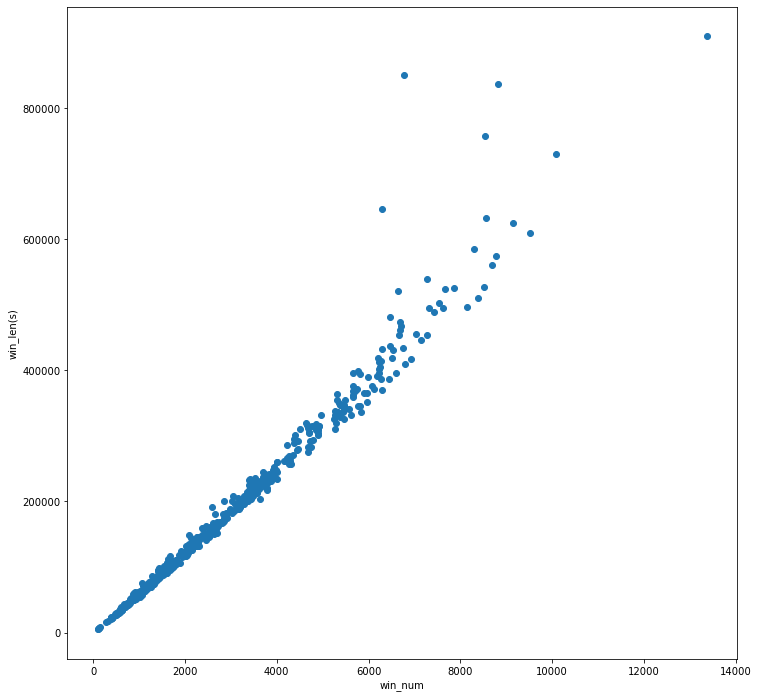

In [14]:
plt.figure(figsize=(12,12))
plt.scatter(df_win_num_all.win_num_all,df_win_num_all.win_len_all*0.1)
plt.xlabel("win_num")
plt.ylabel("win_len(s)")

Text(0, 0.5, 'win_len(s)')

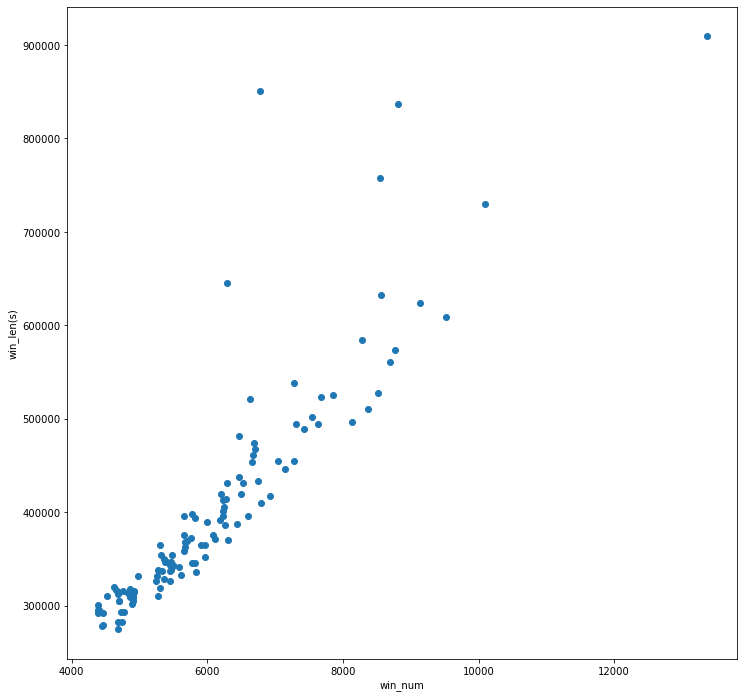

In [15]:
plt.figure(figsize=(12,12))
plt.scatter(df_win_num_all_first120.win_num_all,df_win_num_all_first120.win_len_all*0.1)
plt.xlabel("win_num")
plt.ylabel("win_len(s)")

In [16]:
# get a dict info_mapper[gcmtid]=(lon,lat,dep)
cmts_path="/Users/ziyixi/work/seismic-code/fwi-script/visualize/data/cmts"
cmts=obspy.read_events(join(cmts_path,"*"))

In [17]:
cmts[0].origins[0].resource_id.id.split("/")[-2]

'200708010815A'

In [18]:
info_mapper={}
for each_cmt in cmts:
    lon=each_cmt.origins[0].longitude
    lat=each_cmt.origins[0].latitude
    dep=each_cmt.origins[0].depth/1000
    gcmtid=each_cmt.origins[0].resource_id.id.split("/")[-2]
    info_mapper[gcmtid]=(lon,lat,dep)

In [19]:
output_dir="/Users/ziyixi/work/seismic-code/fwi-script/visualize/gmt/data"
with open(join(output_dir,"best_120_from_484_station_num.dat"),"w") as f:
    for index,row in df_win_num_all_first120.iterrows():
        gcmtid=row.gcmtid
        lon,lat,dep=info_mapper[gcmtid]
        f.write(f"{lon} {lat} {row.win_num_all} \n")